## Arbitrage-free models

### 1. Black-Derman-Toy model

In [ ]:
r= [0.1,0.11,0.12,0.125,0.13] #Zero_coupon R_i (R_0,R_5)
b0= 0.19
dt=1
def payoff(r,sigma,dt):
    payoff=[]
    for i in range(0, len(r)):
        R= 1/((1+r[i])**(i*dt))
        payoff.append(R)
    return payoff

payoff=payoff(r,b0,dt)
print(payoff)

import math 
from scipy.optimize import fsolve
def node(r): #this step is additional. I calculate the volatility*previous volatility rate*0.5
    node=[]# (R_1,R_5)
    for i in range(1,len(r)) :
        g= (1+r[i-1])/((1+r[i])**(i))
        node.append(g)
    return node


node=node(r)
print(node)


def rate(x):
    ru= x* math.exp(2*0.19)
    rd= x
    return 0.5*((1/(1+ru))+(1/(1+rd)))

rd=fsolve(rate,node[0])
ru=rd* math.exp(2*0.19)
print(ru,rd)

def rate2(x):
    rud=x
    ruu= x* math.exp(3*0.18)
    rdd= x/(math.exp(3*0.18))
    return (0.5**2) *((1/(1+rud)*(1/(1+ru)+1/(1+rd)) + (1/(1+ru)*1/(1+ruu) + (1/(1+rd)*1/(1+rdd)))))
rud= fsolve(rate2, node[1])
ruu= rud* math.exp(3*0.18)
rdd= rud/ math.exp(3*0.18)
print(ruu,rud,rdd)
# I will not focus too much on this model in this notebook

### 2. Hull-White model

In [3]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

UsageError: Line magic function `%` not found.


In [25]:
sigma = 0.1
a= 0.01
T=360
length= 10 # i 
forward_rate = 0.2941 # Appl as july 28 2024
day_count=ql.Thirty360(ql.Thirty360.BondBasis) #30/360 day count convention
# My library is in v1.28, for the v1.23, it works fine with ql.Thrity360()
today_date= ql.Date(28,7,2024)

ql.Settings.instance().evaluationDate = today_date
flat_curve= ql.FlatForward(today_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)),day_count) # flat forward curve ( mean value)
spot_curve_handle= ql.YieldTermStructureHandle(flat_curve)

hw_process= ql.HullWhiteProcess(spot_curve_handle,a,sigma)
dW = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(T, ql.UniformRandomGenerator())) # create a gaussian process
seq = ql.GaussianPathGenerator(hw_process, length, T, rng, False) # sequence for the process 


#node function
def node (num_path,T):
    array= np.zeros((num_path,T+1))
    for a in range (num_paths) :
        sample_path= seq.next()
        path= sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[i] for i in range(len(path))]
        array[a,:]= np.array(value)
    return np.array(time), array

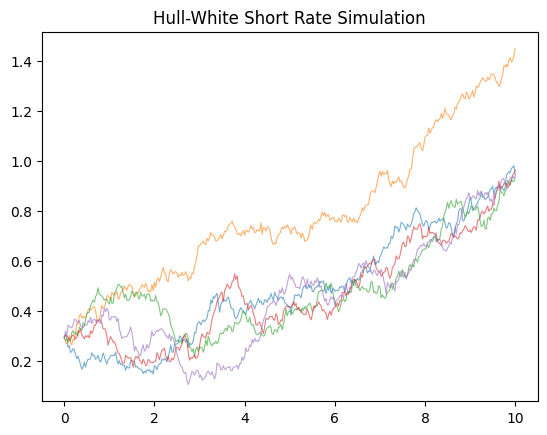

In [26]:
num_paths = 5
time, paths = node(num_paths, T)
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

Now we compare the difference between the simultion and theory(blue line)

In [38]:
num_paths = 1000
time, paths = node(num_paths, T)

In [39]:
vol= [np.var(paths[:, i]) for i in range(T+1)]
avg = [np.mean(paths[:, i]) for i in range(T+1)]
alpha= forward_rate + 0.5* np.power(sigma/a*(1.0 - np.exp(-a*time)), 2)
theta = sigma*sigma/(2*a)*(1.0-np.exp(-2.0*a*np.array(time)))

Text(0.5, 1.0, 'Variance of Short Rates')

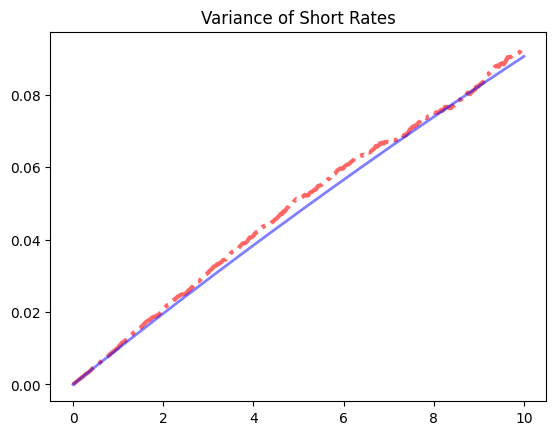

In [40]:
plt.plot(time, vol, "r-.", lw=3, alpha=0.6)
plt.plot(time,theta, "b-", lw=2, alpha=0.5)
plt.title("Variance of Short Rates")

Text(0.5, 1.0, 'Mean of Short Rates')

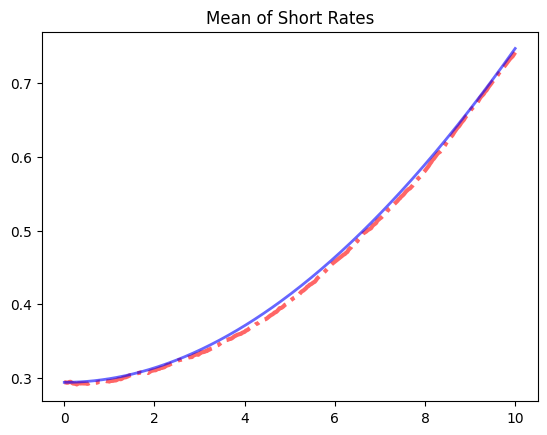

In [42]:
plt.plot(time, avg, "r-.", lw=3, alpha=0.6)
plt.plot(time,alpha, "b-", lw=2, alpha=0.6)
plt.title("Mean of Short Rates")